# 🔍 SVM Classification with Scikit-learn on Iris Dataset
This notebook demonstrates a complete machine learning workflow for multiclass classification using Support Vector Machine (SVM) algorithm on the Iris dataset. The project includes data loading, preprocessing, exploratory data analysis (EDA), model training with hyperparameter tuning, comprehensive evaluation with visualizations, and insights into model performance.

In [1]:
# Cell 1: Import libraries and set global configurations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import warnings
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import os

warnings.filterwarnings('ignore')

# Jupyter visualization settings
%config InlineBackend.figure_format = 'retina'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Cell 2: Load Iris dataset
# Load the iris dataset
iris_data = load_iris()
X = iris_data.data
y = iris_data.target

# Create a DataFrame for easier handling
feature_names = iris_data.feature_names
target_names = iris_data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['species'] = df['target'].map({i: name for i, name in enumerate(target_names)})

print(f"Dataset shape: {df.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(target_names)}")
print(f"Classes: {target_names}")
print(f"Class distribution:\n{pd.Series(y).value_counts().sort_index()}")

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset shape: (150, 6)
Number of features: 4
Number of classes: 3
Classes: ['setosa' 'versicolor' 'virginica']
Class distribution:
0    50
1    50
2    50
Name: count, dtype: int64

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  


In [3]:
# Cell 3: Data preprocessing
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Separate features and target
X = df.drop(['target', 'species'], axis=1)
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features (SVM is sensitive to feature scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print(f"Feature scaling applied: Yes")

Missing values per column:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64
Training set size: 120
Test set size: 30
Feature scaling applied: Yes


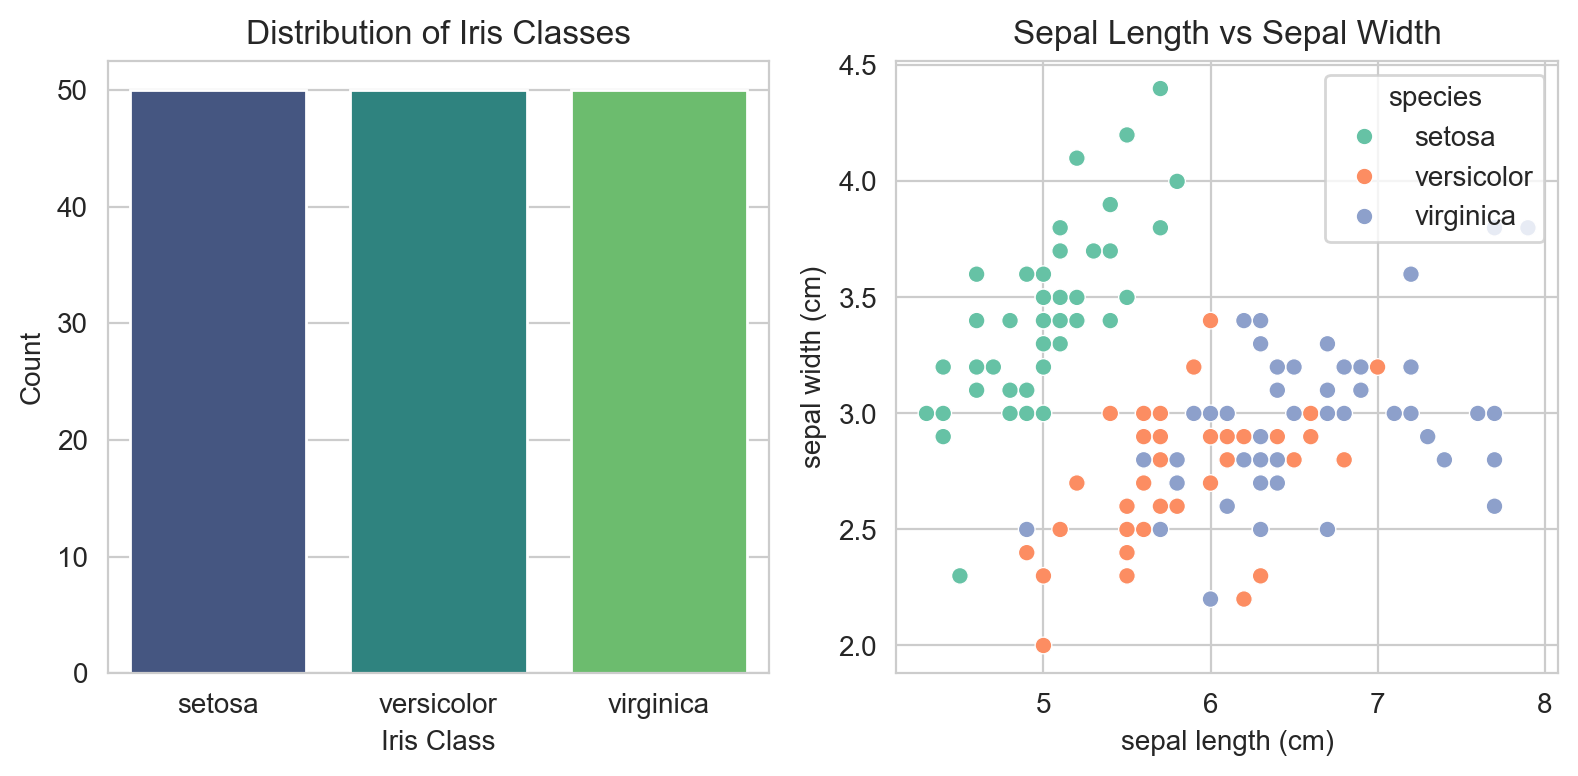

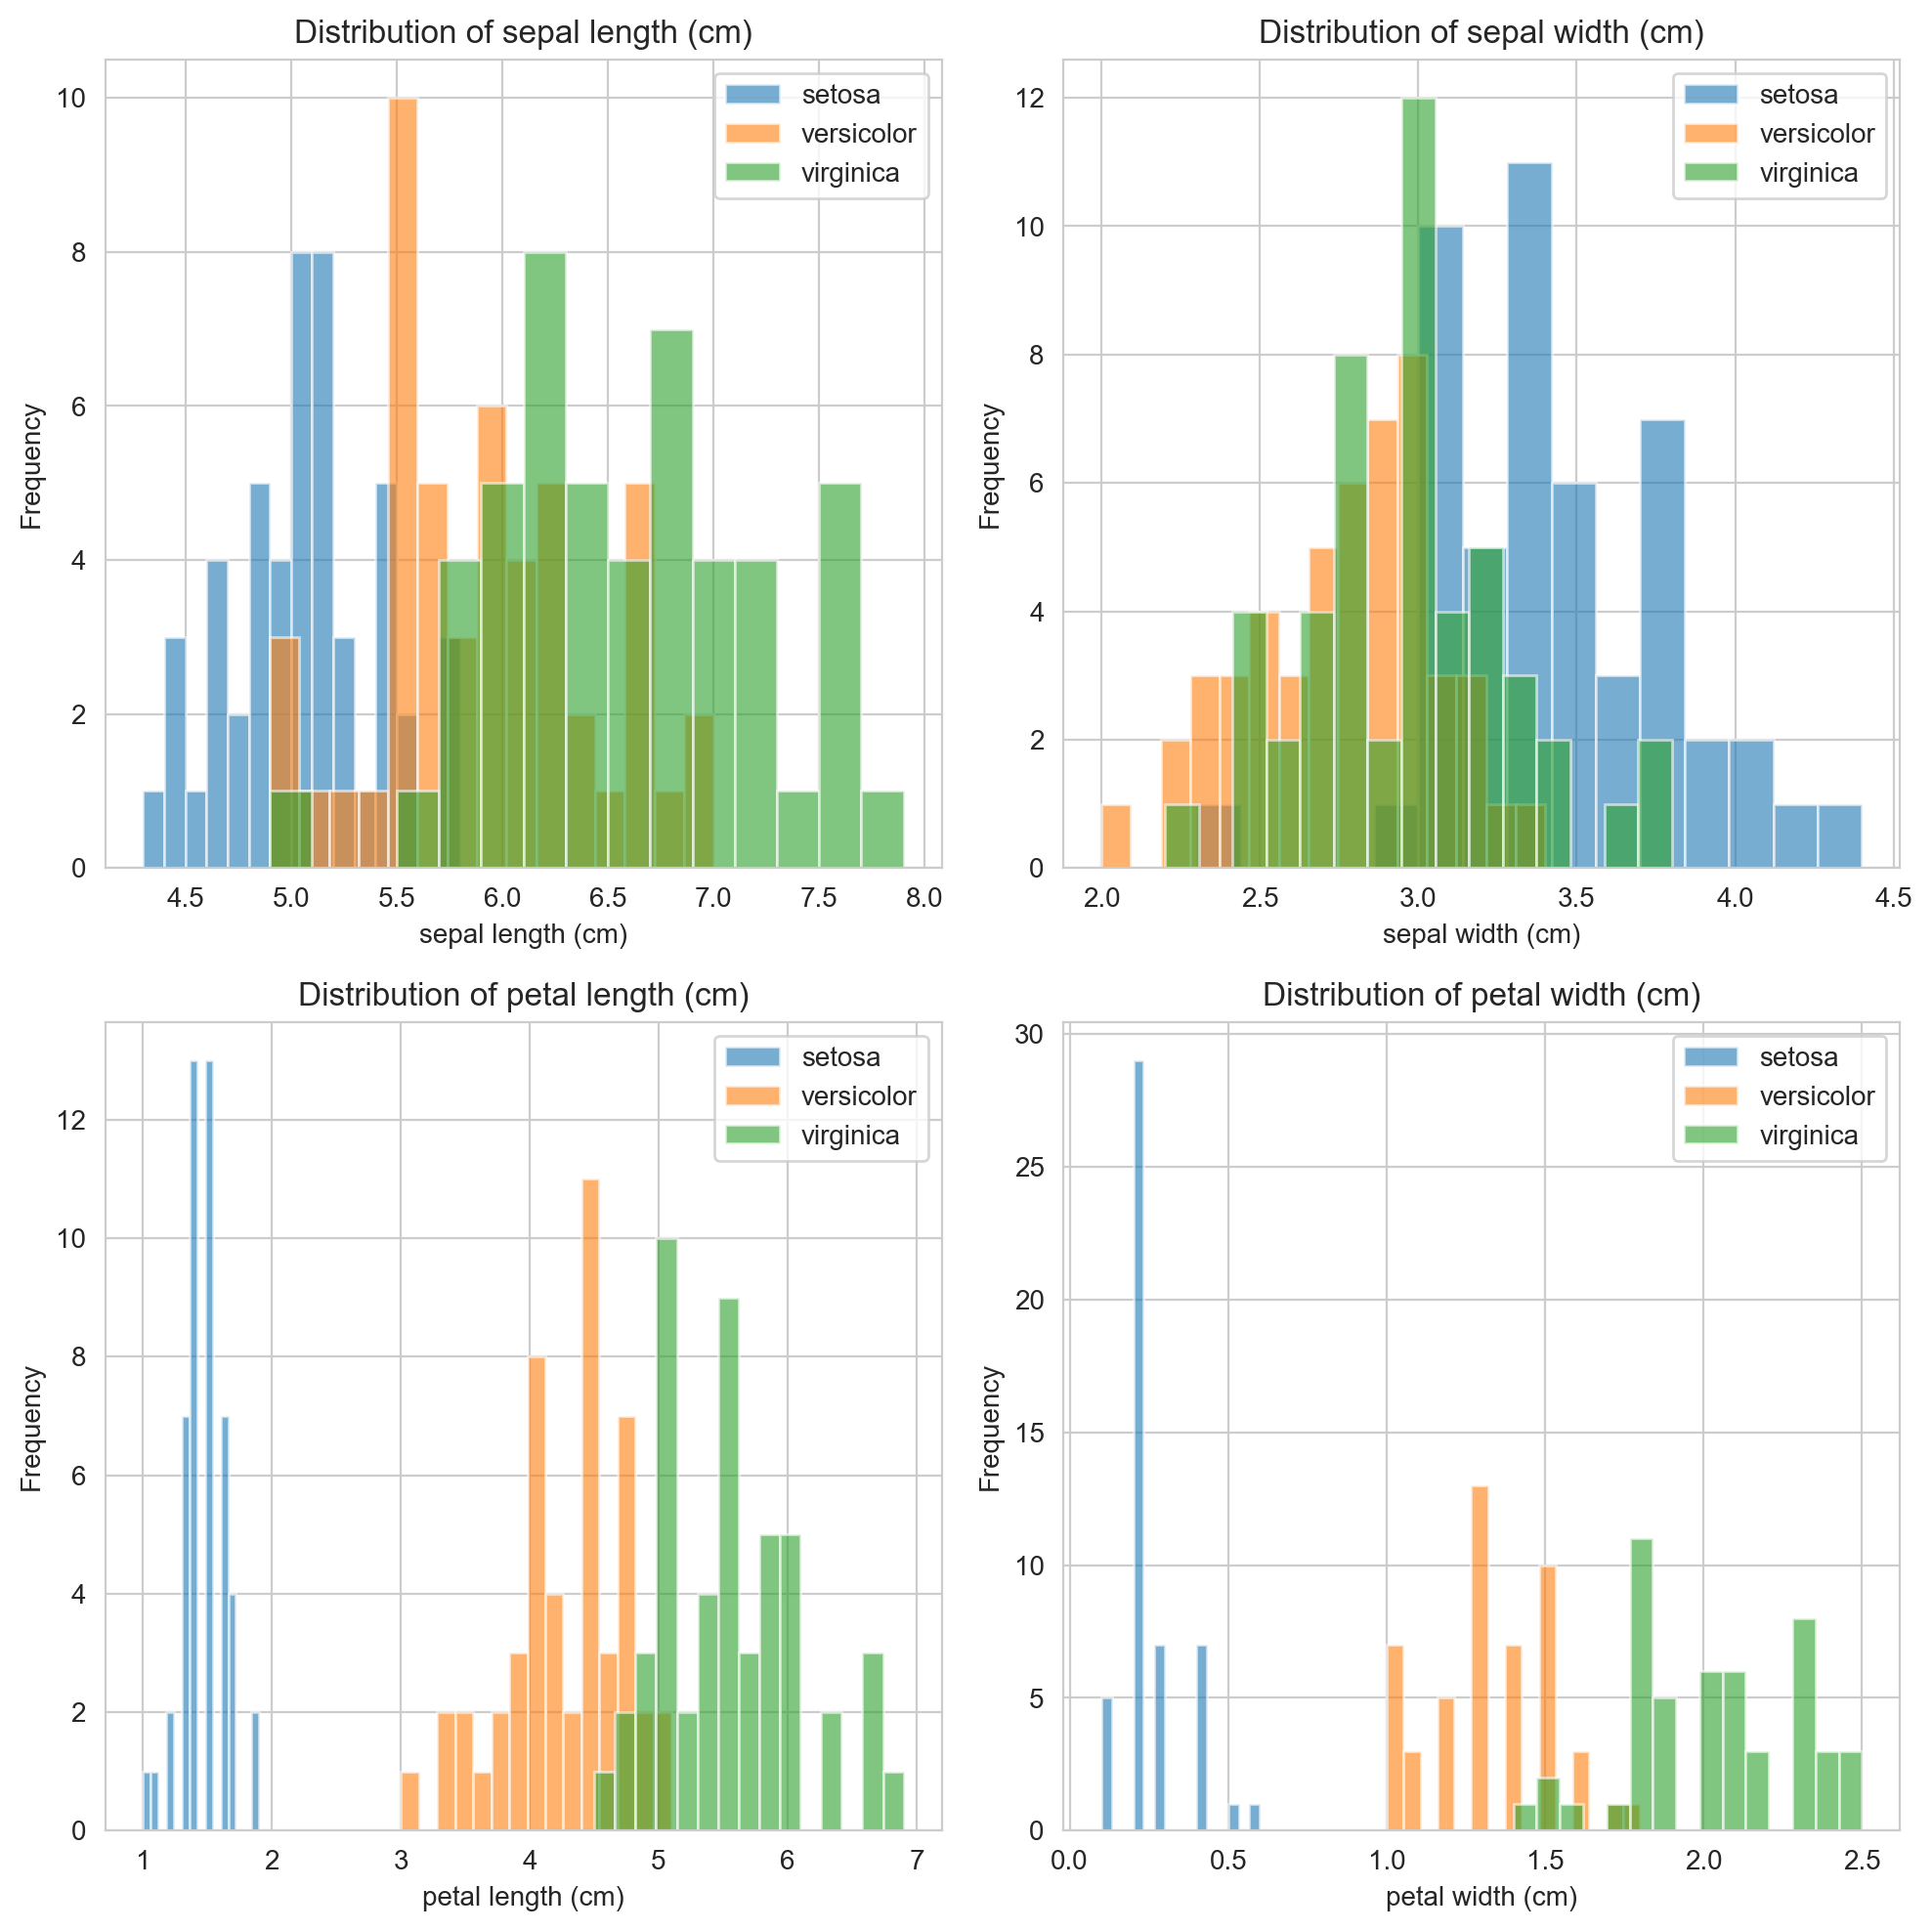

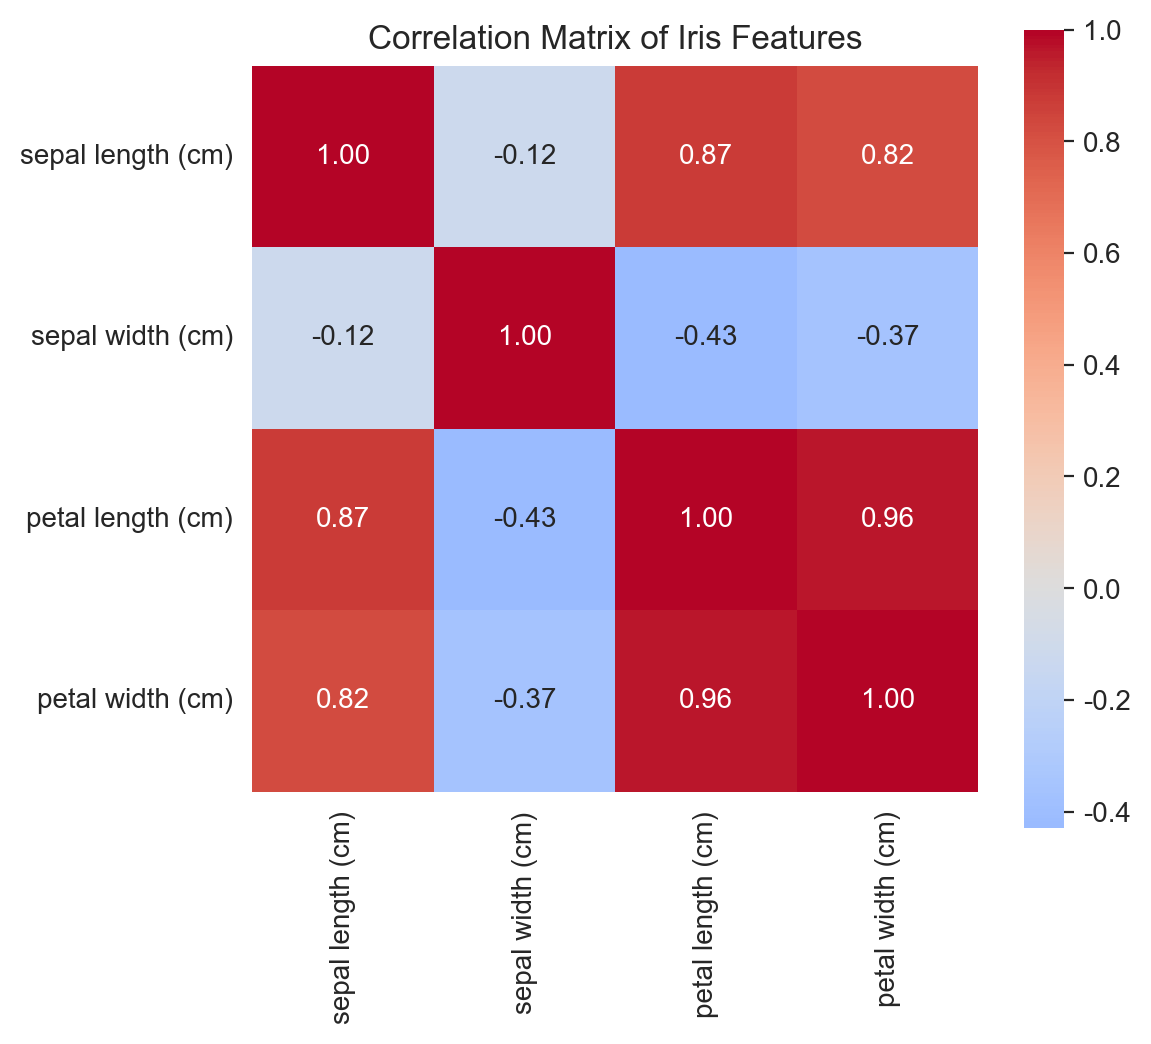

In [7]:
# Cell 4: Exploratory Data Analysis
# Visualize class distribution
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y, palette='viridis')
plt.title('Distribution of Iris Classes')
plt.xlabel('Iris Class')
plt.ylabel('Count')
plt.xticks(range(len(target_names)), target_names)

# Pairplot to visualize feature relationships
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species', palette='Set2')
plt.title('Sepal Length vs Sepal Width')
plt.tight_layout()
plt.show()

# Feature distribution by class
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, feature in enumerate(feature_names):
    ax = axes[i//2, i%2]
    for class_idx, class_name in enumerate(target_names):
        class_data = df[df['target'] == class_idx][feature]
        ax.hist(class_data, alpha=0.6, label=class_name, bins=15)
    ax.set_title(f'Distribution of {feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(6, 6))
corr_matrix = df[feature_names].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix of Iris Features')
plt.tight_layout()
plt.show()

In [8]:
# Cell 5: Train SVM model with hyperparameter tuning
# Define the SVM model
svm_model = SVC(random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}

print("Performing hyperparameter tuning...")
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_svm_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_:.4f}")

# Train the model with best parameters
best_svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {accuracy:.4f}")

Performing hyperparameter tuning...
Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.9833
Test accuracy: 0.9667


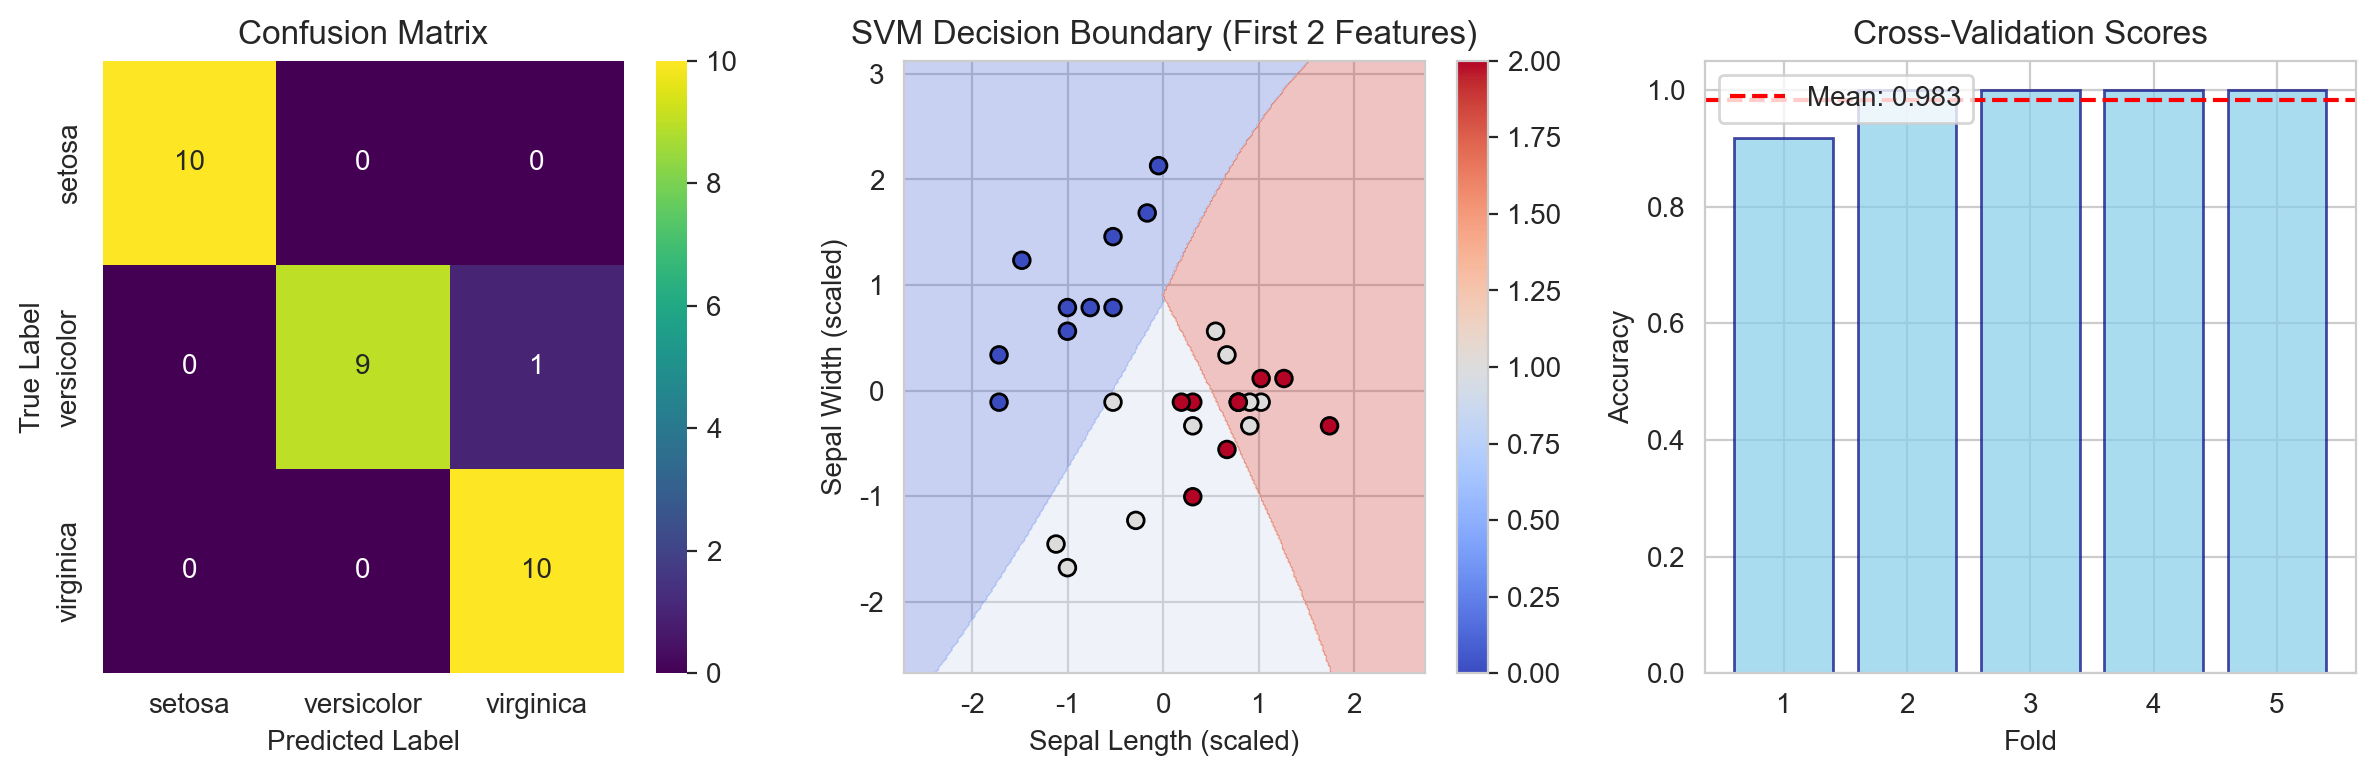


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [10]:
# Cell 6: Visualization of results
# Confusion matrix
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Decision boundary visualization (for 2D projection)
plt.subplot(1, 3, 2)
# Use only first two features for visualization
X_vis = X_test_scaled[:, :2]
h = 0.02
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Create a model with only 2 features for visualization
svm_2d = SVC(kernel=best_svm_model.kernel, C=best_svm_model.C, gamma=best_svm_model.gamma, random_state=42)
svm_2d.fit(X_train_scaled[:, :2], y_train)
Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title('SVM Decision Boundary (First 2 Features)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.colorbar(scatter)

# Cross-validation scores
plt.subplot(1, 3, 3)
cv_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5)
plt.bar(range(1, len(cv_scores)+1), cv_scores, color='skyblue', edgecolor='navy', alpha=0.7)
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Mean: {cv_scores.mean():.3f}')
plt.title('Cross-Validation Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

Number of support vectors: [ 6 23 21]
Support vectors per class: {np.str_('setosa'): np.int32(6), np.str_('versicolor'): np.int32(23), np.str_('virginica'): np.int32(21)}
Total support vectors: 50


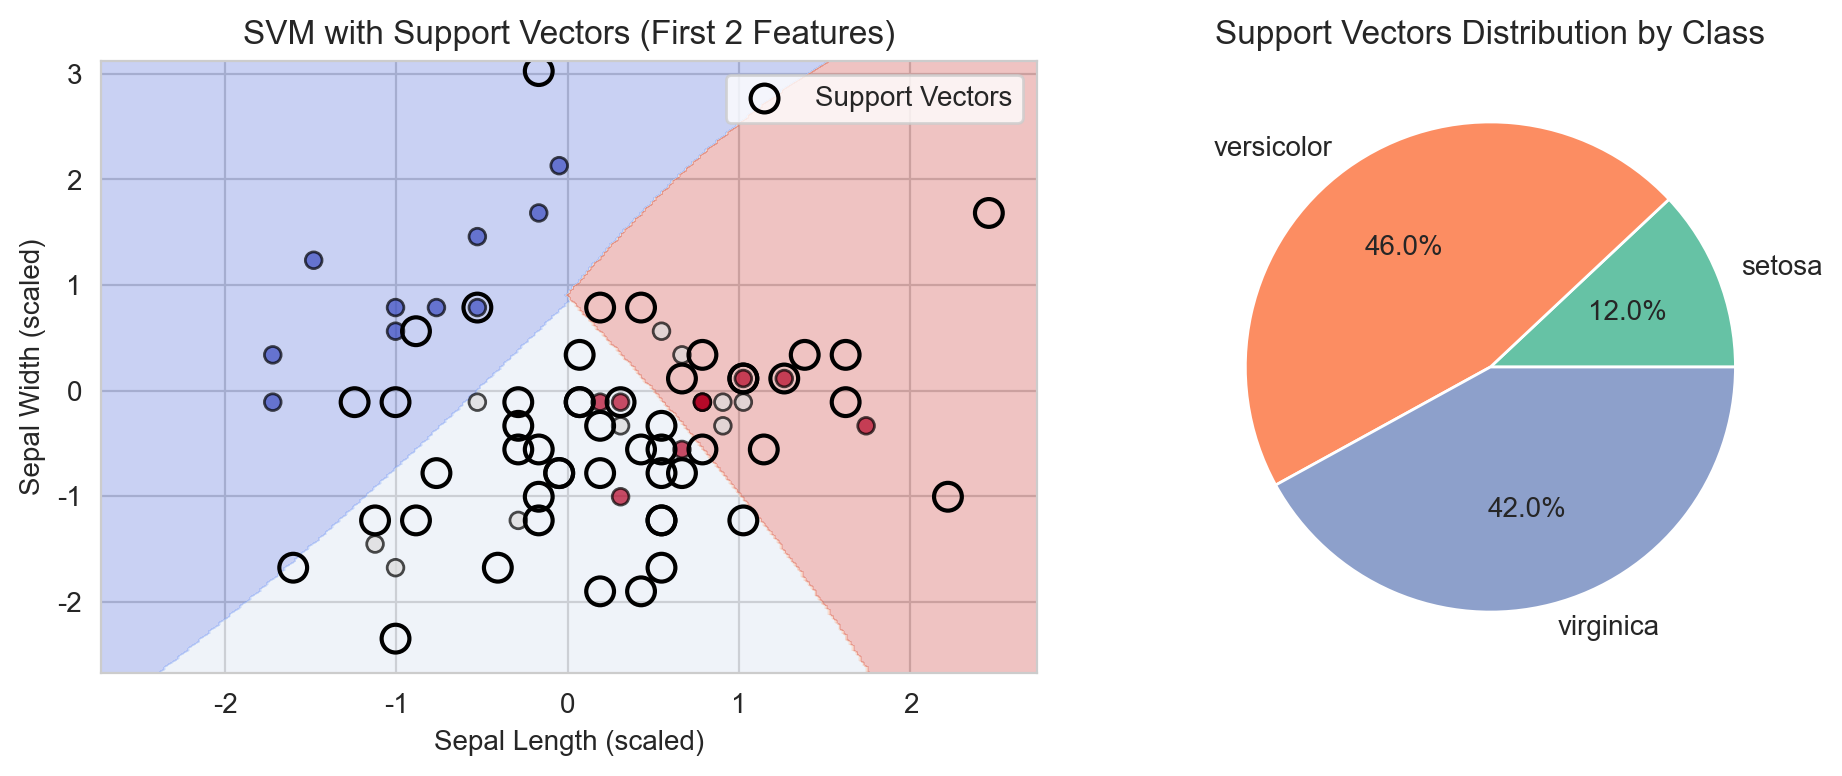

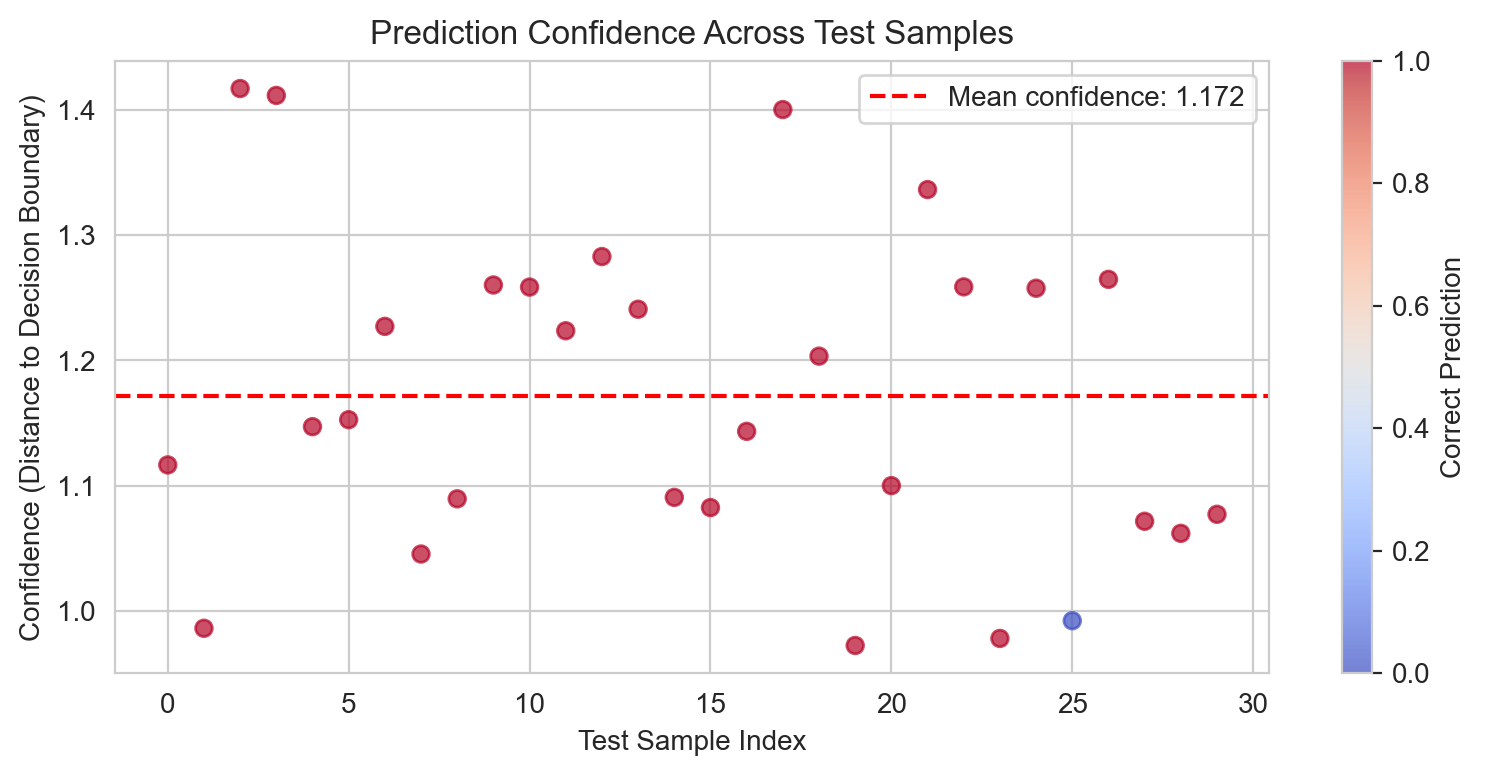

In [13]:
# Cell 7: Model analysis and insights
# Support vectors analysis
print(f"Number of support vectors: {best_svm_model.n_support_}")
print(f"Support vectors per class: {dict(zip(target_names, best_svm_model.n_support_))}")
print(f"Total support vectors: {best_svm_model.support_vectors_.shape[0]}")

# Visualize support vectors
plt.figure(figsize=(10, 4))

# Plot support vectors on the 2D decision boundary
plt.subplot(1, 2, 1)
# Transform support vectors to the same 2D space
support_vectors_2d = best_svm_model.support_vectors_[:, :2]
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolors='k', alpha=0.7)
plt.scatter(support_vectors_2d[:, 0], support_vectors_2d[:, 1], s=100, facecolors='none',
            edgecolors='black', linewidth=1.5, label='Support Vectors')
plt.title('SVM with Support Vectors (First 2 Features)')
plt.xlabel('Sepal Length (scaled)')
plt.ylabel('Sepal Width (scaled)')
plt.legend()

# Feature importance for linear kernel (if applicable)
plt.subplot(1, 2, 2)
if best_svm_model.kernel == 'linear':
    # For linear SVM, we can extract feature weights
    coef = best_svm_model.dual_coef_
    # For multiclass, we take the average absolute coefficient across all classes
    feature_weights = np.mean(np.abs(coef), axis=0) if coef.shape[0] == 1 else np.mean(np.abs(coef), axis=0)[:X.shape[1]]
    plt.bar(range(len(feature_names)), feature_weights, color=sns.color_palette('viridis', len(feature_names)))
    plt.xticks(range(len(feature_names)), [name.split()[0] for name in feature_names], rotation=45)
    plt.title('Feature Weights (Linear SVM)')
    plt.ylabel('Weight Magnitude')
else:
    # For non-linear kernels, show support vector distribution
    plt.pie(best_svm_model.n_support_, labels=target_names, autopct='%1.1f%%', colors=sns.color_palette('Set2'))
    plt.title('Support Vectors Distribution by Class')

plt.tight_layout()
plt.show()

# Prediction confidence (distance to decision boundary)
if hasattr(best_svm_model, "decision_function"):
    decision_values = best_svm_model.decision_function(X_test_scaled)

    # For multiclass, take the difference between the two closest classes
    if decision_values.ndim > 1:
        # Sort decision values to find the two largest
        sorted_decision = np.sort(decision_values, axis=1)
        # Difference between top two scores as confidence measure
        confidence = sorted_decision[:, -1] - sorted_decision[:, -2]
    else:
        confidence = np.abs(decision_values)

    plt.figure(figsize=(8, 4))
    correct_pred = y_test == y_pred
    plt.scatter(range(len(confidence)), confidence, c=correct_pred, cmap='coolwarm', alpha=0.7)
    plt.axhline(y=np.mean(confidence), color='red', linestyle='--', label=f'Mean confidence: {np.mean(confidence):.3f}')
    plt.title('Prediction Confidence Across Test Samples')
    plt.xlabel('Test Sample Index')
    plt.ylabel('Confidence (Distance to Decision Boundary)')
    plt.colorbar(label='Correct Prediction')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [12]:
# Cell 8: Model performance summary and insights
# Summary statistics
print("Model Performance Summary:")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Cross-validation Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Kernel Used: {best_svm_model.kernel}")
print(f"Number of Support Vectors: {best_svm_model.support_vectors_.shape[0]}")

# Analyze prediction errors
error_indices = np.where(y_test != y_pred)[0]
if len(error_indices) > 0:
    print(f"\nNumber of misclassified samples: {len(error_indices)}")
    print("Misclassified samples:")
    for idx in error_indices[:10]:  # Show first 10 errors
        print(f"  Sample {idx}: True={target_names[y_test.iloc[idx]]}, Predicted={target_names[y_pred[idx]]}")
    if len(error_indices) > 10:
        print(f"  ... and {len(error_indices) - 10} more")
else:
    print("\nNo misclassified samples in the test set!")

# Feature scaling importance for SVM
print(f"\nFeature Scaling Importance:")
print(f"SVM is sensitive to feature scales, so standardization was applied.")
print(f"Feature mean after scaling (should be ~0): {np.mean(X_train_scaled, axis=0)[:3]}")
print(f"Feature std after scaling (should be ~1): {np.std(X_train_scaled, axis=0)[:3]}")

# Model complexity based on support vectors
print(f"\nModel Complexity:")
print(f"Ratio of support vectors to training samples: {best_svm_model.support_vectors_.shape[0]/len(X_train_scaled):.3f}")
print(f"A lower ratio indicates a simpler decision boundary")

Model Performance Summary:
Test Accuracy: 0.9667
Cross-validation Score: 0.9833 (+/- 0.0667)
Best Parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Kernel Used: rbf
Number of Support Vectors: 50

Number of misclassified samples: 1
Misclassified samples:
  Sample 25: True=versicolor, Predicted=virginica

Feature Scaling Importance:
SVM is sensitive to feature scales, so standardization was applied.
Feature mean after scaling (should be ~0): [-1.20829273e-15 -2.03679666e-15  4.99600361e-16]
Feature std after scaling (should be ~1): [1. 1. 1.]

Model Complexity:
Ratio of support vectors to training samples: 0.417
A lower ratio indicates a simpler decision boundary
